# mlrose_hiive Tutorial Examples - Genevieve Hayes

## Overview

mlrose_hiive is a Python package for applying some of the most common randomized optimization and search algorithms to a range of different optimization problems, over both discrete- and continuous-valued parameter spaces. This notebook contains the examples used in the mlrose_hiive tutorial.

### Import Libraries

In [1]:
import mlrose_hiive
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

# four peaks


In [3]:
# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.FourPeaks(t_pct=0.2)


### customized fitness function to keep track of evaluations

In [4]:
# Define alternative N-Queens fitness function for maximization problem
evaluations = []
def fourpeak_max(state):
    
    # Initialize counter
    currentfit = fitness.evaluate(state)
    evaluations.append(currentfit)
    return currentfit

In [5]:
# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(fourpeak_max)

In [6]:
# Check function is working correctly
state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
# The fitness of this state should be 22
fitness_cust.evaluate(state)

4

In [7]:
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 60, fitness_fn = fitness_cust, maximize = True, max_val = 2)
problem_cust.set_mimic_fast_mode(True)

In [8]:
OUTPUT_DIRECTORY = 'output'
SEED = 1
experiment_name = 'FourPeaks'


### rhc

In [9]:
from mlrose_hiive.runners import RHCRunner

#experiment_name = 'knapsack'

rhc = RHCRunner(problem=problem_cust,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=[0,100,1000],
                max_attempts=1000,
                restart_list=[0,5,15,25])

df_run_stats, df_run_curves = rhc.run()  

Running rhc
*****************
*** Run START ***
*****************
restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0]...

restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[29], iteration:[100], done:[False], time:[0.01], fitness:[3.0000]
	[1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0]...

restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[13], iteration:[1000], done:[True], time:[0.66], fitness:[27.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0]...

***************
*** Run 

restarts:[15], max_iters:[1000], current_restart:[2]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[19], iteration:[100], done:[False], time:[0.98], fitness:[11.0000]
	[1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0// 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[15], max_iters:[1000], current_restart:[2]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[110], iteration:[1000], done:[True], time:[1.46], fitness:[34.0000]
	[1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[15], max_iters:[1000], current_restart:[3]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[0], iteration:[0], done:[False], time:[1.60], fitness:[3.0000]
	[1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0// 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0]...

restarts:[15], max_iters:[1000], current_restart:[3]
runner_name:[rhc], experiment_na

restarts:[15], max_iters:[1000], current_restart:[11]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[101], iteration:[100], done:[False], time:[15.89], fitness:[4.0000]
	[1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1// 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0]...

restarts:[15], max_iters:[1000], current_restart:[11]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[13], iteration:[1000], done:[True], time:[18.89], fitness:[36.0000]
	[1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[15], max_iters:[1000], current_restart:[12]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[0], iteration:[0], done:[False], time:[19.45], fitness:[4.0000]
	[1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1// 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0]...

restarts:[15], max_iters:[1000], current_restart:[12]
runner_name:[rhc], experim

restarts:[25], max_iters:[1000], current_restart:[4]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[39], iteration:[1000], done:[True], time:[4.97], fitness:[19.0000]
	[0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1// 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[25], max_iters:[1000], current_restart:[5]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[0], iteration:[0], done:[False], time:[5.34], fitness:[0.0000]
	[0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1// 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1]...

restarts:[25], max_iters:[1000], current_restart:[5]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[53], iteration:[100], done:[False], time:[5.37], fitness:[5.0000]
	[0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1// 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0]...

restarts:[25], max_iters:[1000], current_restart:[5]
runner_name:[rhc], experiment_name

restarts:[25], max_iters:[1000], current_restart:[13]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[66], iteration:[1000], done:[True], time:[20.31], fitness:[35.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1// 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0]...

restarts:[25], max_iters:[1000], current_restart:[14]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[0], iteration:[0], done:[False], time:[20.79], fitness:[2.0000]
	[0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1// 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0]...

restarts:[25], max_iters:[1000], current_restart:[14]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[13], iteration:[100], done:[False], time:[20.91], fitness:[20.0000]
	[0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1// 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

restarts:[25], max_iters:[1000], current_restart:[14]
runner_name:[rhc], experim

restarts:[25], max_iters:[1000], current_restart:[22]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[137], iteration:[1000], done:[True], time:[43.39], fitness:[44.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0]...

restarts:[25], max_iters:[1000], current_restart:[23]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[0], iteration:[0], done:[False], time:[44.44], fitness:[0.0000]
	[0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1// 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1]...

restarts:[25], max_iters:[1000], current_restart:[23]
runner_name:[rhc], experiment_name:[FourPeaks], attempt:[12], iteration:[100], done:[False], time:[44.73], fitness:[2.0000]
	[1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1// 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1]...

restarts:[25], max_iters:[1000], current_restart:[23]
runner_name:[rhc], experim

In [12]:
df_run_stats.groupby(['Restarts'])['Time','Fitness'].mean()

,Time,Fitness
Restarts,,
0,0.222510,10.666667
5,1.275528,12.555556
15,11.153668,15.625000
25,20.894946,14.858974


In [75]:
evaluations = []
best_state, best_fitness, fitness_curve_rhc,time_curve_rhc,all_time = mlrose_hiive.random_hill_climb(problem_cust, 
                                                                            max_attempts=100, max_iters=np.inf, restarts=25,
                      curve=True, random_state = 1)

In [14]:
best_fitness

32.0

In [15]:
best_state

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

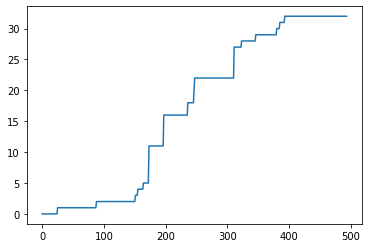

In [16]:
plt.plot(fitness_curve_rhc)

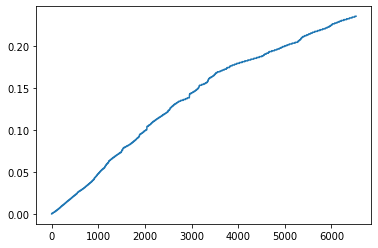

In [17]:
plt.plot(all_time)

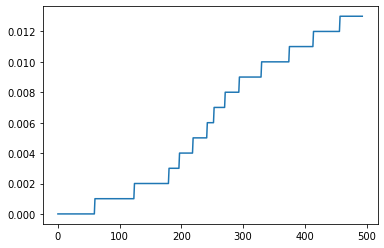

In [18]:
plt.plot(time_curve_rhc)

In [18]:
time_curve_rhc[:50]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00100017,
       0.00100017, 0.00100017, 0.00100017, 0.00100017, 0.00100017,
       0.00100017, 0.00100017, 0.00100017, 0.00100017, 0.00100017,
       0.00100017, 0.00100017, 0.00100017, 0.00100017, 0.00100017,
       0.00100017, 0.00100017, 0.00200009, 0.00200009, 0.00200009,
       0.00200009, 0.00200009, 0.00200009, 0.00200009, 0.00200009,
       0.00200009, 0.00200009, 0.00200009, 0.00200009, 0.00200009,
       0.00200009, 0.00300241, 0.00300241, 0.00300241, 0.00300241])

In [19]:
fitness_curve_rhc[:50]

array([16500., 16500., 16500., 16570., 16588., 16693., 16698., 16708.,
       16710., 16710., 16858., 16858., 16858., 16865., 17095., 17124.,
       17324., 17324., 17404., 17406., 17451., 17451., 17451., 17526.,
       17526., 17526., 17526., 17526., 17566., 17734., 17827., 17827.,
       17827., 17827., 17977., 18289., 18289., 18289., 18289., 18289.,
       18377., 18425., 18425., 18425., 18425., 18677., 18677., 18677.,
       18683., 18683.])

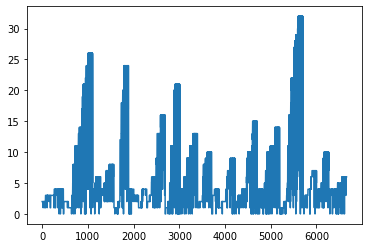

In [76]:
plt.plot(evaluations)
evaluations_rhc = evaluations.copy()
evaluations = []

### SA

In [20]:
from mlrose_hiive.runners import SARunner

sa = SARunner(problem=problem_cust,
              experiment_name=experiment_name,
              output_directory='output/',
              seed=1,
              iteration_list=[0,100,1000],
              max_attempts=1000,
              temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000])
# the two data frames will contain the results
df_run_stats, df_run_curves = sa.run()        

Running sa
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[1000]
runner_name:[sa], experiment_name:[FourPeaks], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0]...

schedule:[1], max_iters:[1000]
runner_name:[sa], experiment_name:[FourPeaks], attempt:[1], iteration:[100], done:[False], time:[0.01], fitness:[1.0000]
	[0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1// 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0]...

schedule:[1], max_iters:[1000]
runner_name:[sa], experiment_name:[FourPeaks], attempt:[2], iteration:[1000], done:[True], time:[0.18], fitness:[38.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*********

schedule:[5000], max_iters:[1000]
runner_name:[sa], experiment_name:[FourPeaks], attempt:[2], iteration:[1000], done:[True], time:[0.38], fitness:[21.0000]
	[0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1// 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10000], max_iters:[1000]
runner_name:[sa], experiment_name:[FourPeaks], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0]...

schedule:[10000], max_iters:[1000]
runner_name:[sa], experiment_name:[FourPeaks], attempt:[1], iteration:[100], done:[False], time:[0.01], fitness:[1.0000]
	[1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1// 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0]...

schedule:[10000], max_iters:[1000]
runner_nam

In [22]:
df_run_curves.head(10)

,Iteration,Time,Fitness,Temperature,max_iters
0,0,0.000115,2.0,1,1000
1,1,0.000990,2.0,1,1000
2,2,0.001089,2.0,1,1000
3,3,0.001184,2.0,1,1000
4,4,0.001271,2.0,1,1000
5,5,0.001354,2.0,1,1000
6,6,0.001435,2.0,1,1000
7,7,0.001516,2.0,1,1000
8,8,0.001584,2.0,1,1000
9,9,0.001667,2.0,1,1000


In [33]:
schedule = 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
# Solve using simulated annealing - attempt 1
schedule = mlrose_hiive.ExpDecay(init_temp=1)
evaluations = []
best_state, best_fitness, fitness_curve_sa,time_curve_sa = mlrose_hiive.simulated_annealing(problem_cust, 
                                                                                            schedule = schedule, 
                                                      max_attempts = 100, 
                                                                            max_iters = 10000, 
                                                                                    
                                                       random_state = 1,curve=True)


In [26]:
best_fitness

60.0

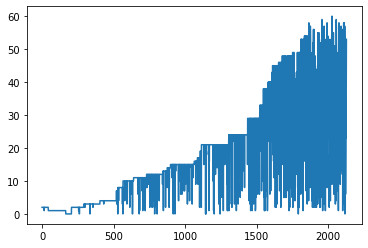

In [74]:
plt.plot(evaluations)
evaluations_sa = evaluations.copy()
evaluations = []

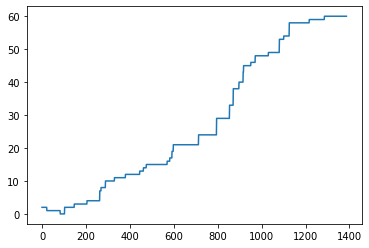

In [28]:
plt.plot(fitness_curve_sa)


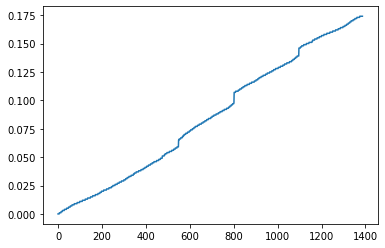

In [29]:
plt.plot(time_curve_sa)

### GA

In [30]:
from mlrose_hiive.runners import GARunner

ga = GARunner(problem=problem_cust,
              experiment_name=experiment_name,
              output_directory=OUTPUT_DIRECTORY,
              seed=SEED,
              iteration_list=[0,100,1000],
              max_attempts=1000,
              population_sizes=[150, 200, 300],
              mutation_rates=[0.4, 0.5, 0.6])

# the two data frames will contain the results
df_run_stats, df_run_curves = ga.run()   

Running ga
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.4], max_iters:[1000]
runner_name:[ga], experiment_name:[FourPeaks], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0]...

pop_size:[150], mutation_prob:[0.4], max_iters:[1000]
runner_name:[ga], experiment_name:[FourPeaks], attempt:[11], iteration:[100], done:[False], time:[2.31], fitness:[60.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

pop_size:[150], mutation_prob:[0.4], max_iters:[1000]
runner_name:[ga], experiment_name:[FourPeaks], attempt:[911], iteration:[1000], done:[True], time:[31.36], fitness:[60.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

***************
***

pop_size:[300], mutation_prob:[0.6], max_iters:[1000]
runner_name:[ga], experiment_name:[FourPeaks], attempt:[37], iteration:[100], done:[False], time:[4.03], fitness:[60.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

pop_size:[300], mutation_prob:[0.6], max_iters:[1000]
runner_name:[ga], experiment_name:[FourPeaks], attempt:[937], iteration:[1000], done:[True], time:[42.54], fitness:[60.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

***************
*** Run END ***
***************
Run time: 331.77905599999985
Saving: [output\FourPeaks\ga__FourPeaks__run_stats_df.csv]
Saving: [output\FourPeaks\ga__FourPeaks__curves_df.csv]


In [31]:
df_run_stats.groupby(['Population Size','Mutation Rate'])['Time','Fitness'].sum()

Time  Fitness
Population Size Mutation Rate                    
150             0.4            33.672298    122.0
                0.5            40.806311    122.0
                0.6            34.363510    119.0
200             0.4            34.583695    122.0
                0.5            38.249561    122.0
                0.6            34.078182    216.0
300             0.4            54.178642    216.0
                0.5            47.959466    213.0
                0.6            46.577788    122.0

In [32]:
df_run_stats.groupby(['Population Size','Mutation Rate'])['Time','Fitness'].max()

Time  Fitness
Population Size Mutation Rate                    
150             0.4            31.355353     60.0
                0.5            34.990566     60.0
                0.6            31.263342     60.0
200             0.4            31.587773     60.0
                0.5            34.917729     60.0
                0.6            30.930705    107.0
300             0.4            49.534204    107.0
                0.5            43.754218    107.0
                0.6            42.539056     60.0

In [71]:
# Solve using genetic algorithm
evaluations = []
best_state, best_fitness, fitness_curve_ga,time_curve_ga = mlrose_hiive.genetic_alg(problem_cust, mutation_prob = 0.6,
                                                                      pop_size= 200,
                                                                       max_attempts = 100, 
                                              random_state = 2,curve=True)


In [35]:
best_fitness

107.0

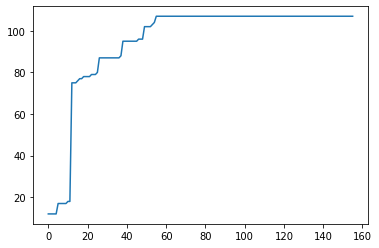

In [36]:
plt.plot(fitness_curve_ga)

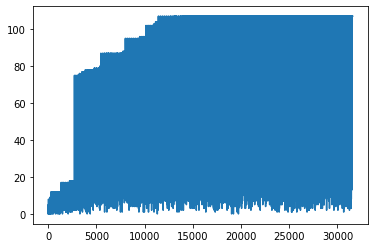

In [72]:
plt.plot(evaluations)
evaluations_ga = evaluations.copy()
evaluations=[]

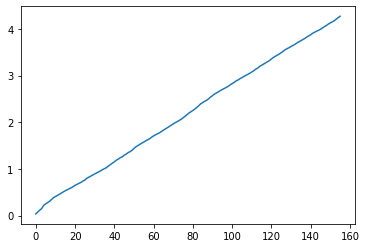

In [38]:
plt.plot(time_curve_ga)

In [41]:
from mlrose_hiive.runners import MIMICRunner

#experiment_name = 'example_experiment'
#problem = TSPGenerator.generate(seed=SEED, number_of_cities=22)

mmc = MIMICRunner(problem=problem_cust,
                  experiment_name=experiment_name,
                  output_directory=OUTPUT_DIRECTORY,
                  seed=2,
                  iteration_list=[1000],
                  max_attempts=100,
                  population_sizes=[100],#150, 200, 300],
                  keep_percent_list=[0.25, 0.5, 0.75])


In [42]:
df_run_stats, df_run_curves = mmc.run()   

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[100], keep_pct:[0.25], max_iters:[1000]
runner_name:[mimic], experiment_name:[FourPeaks], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[0.0000]
	[0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1// 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1]...

use_fast_mimic:[False], pop_size:[100], keep_pct:[0.25], max_iters:[1000]
runner_name:[mimic], experiment_name:[FourPeaks], attempt:[101], iteration:[107], done:[True], time:[263.36], fitness:[15.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1.// 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.// 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[100], keep_pct:[0.5], max_iters:[1000]
runner_name:[mimic], experiment_name:[F

In [43]:
df_run_stats

,Iteration,Fitness,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.0,0.004236,"[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...",False,100,0.25,1000
1,1000,15.0,263.363927,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",False,100,0.25,1000
2,0,0.0,0.002130,"[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...",False,100,0.50,1000
3,1000,15.0,269.882279,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",False,100,0.50,1000
4,0,0.0,0.002256,"[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...",False,100,0.75,1000
5,1000,15.0,321.447360,"[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",False,100,0.75,1000


In [58]:
#%time
evaluations = []
best_state, best_fitness, fitness_curve_bag_queen_mmc,time_curve_mmc = mlrose_hiive.mimic(problem_cust,  
                                                                max_attempts = 30, 
                                                                 max_iters=100,
                                              random_state = 20,curve=True
                                            ,keep_pct=0.25,pop_size=200
                                                                                         )

In [59]:
best_state

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
best_fitness

81.0

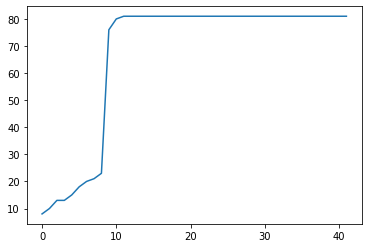

In [61]:
plt.plot(fitness_curve_bag_queen_mmc)

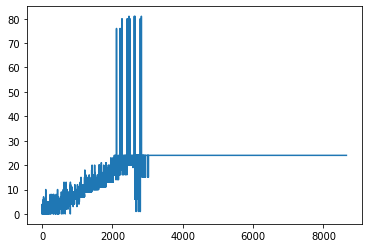

In [70]:
plt.plot(evaluations)
evaluations_mimc = evaluations.copy()

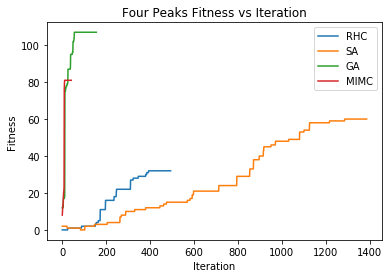

In [65]:
plt.plot(fitness_curve_rhc,label='RHC')
plt.plot(fitness_curve_sa,label='SA')
plt.plot(fitness_curve_ga,label = 'GA')
plt.plot(fitness_curve_bag_queen_mmc,label='MIMC')

plt.title('Four Peaks Fitness vs Iteration')
plt.ylabel('Fitness')
plt.xlabel('Iteration')
plt.legend()
plt.savefig('output/fourpeaks_fit_iter.png')

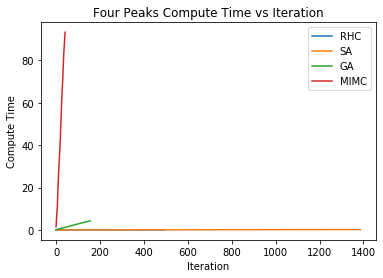

In [69]:
plt.plot(time_curve_rhc,label='RHC')
plt.plot(time_curve_sa,label='SA')
plt.plot(time_curve_ga,label = 'GA')
plt.plot(time_curve_mmc,label='MIMC')

plt.title('Four Peaks Compute Time vs Iteration')
plt.ylabel('Compute Time')
plt.xlabel('Iteration')
plt.legend()
plt.savefig('output/fourpeaks_time_iter.png')

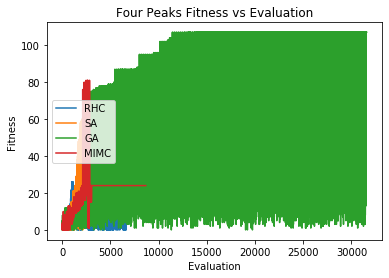

In [77]:
plt.plot(evaluations_rhc,label='RHC')
plt.plot(evaluations_sa,label='SA')
plt.plot(evaluations_ga,label = 'GA')
plt.plot(evaluations_mimc,label='MIMC')

plt.title('Four Peaks Fitness vs Evaluation')
plt.ylabel('Fitness')
plt.xlabel('Evaluation')
plt.legend()
plt.savefig('output/fourpeaks_fit_eval.png')

In [88]:
def get_complexity(problem_custs):
    sac = []
    gac = []
    rhcc = []
    mimicc = []
    for problem_cust in problem_custs:
        rhc = mlrose_hiive.random_hill_climb(problem_cust, max_attempts=100, max_iters=np.inf, restarts=25,
                                             curve=True, random_state = 1)
        print('rhc done')
        ga = mlrose_hiive.genetic_alg(problem_cust, mutation_prob = 0.6,
                                                                      pop_size= 200,
                                                                       max_attempts = 100, 
                                              random_state = 2,curve=True)
        print('ga done')

        mimc = mlrose_hiive.mimic(problem_cust,  
                                                                max_attempts = 30, 
                                                                 max_iters=100,
                                              random_state = 20,curve=True
                                            ,keep_pct=0.25,pop_size=200)
        print(mimc)
        print('mimc done')
        
        sa = mlrose_hiive.simulated_annealing(problem_cust, 
                                                                                            schedule = schedule, 
                                                      max_attempts = 100, 
                                                                            max_iters = 10000, 
                                                                                    
                                                       random_state = 1,curve=True)
        print('sa done')
        sac.append([len(sa[2]),sa[3][-1]])
        gac.append([len(ga[2]),ga[3][-1]])
        rhcc.append([len(rhc[2]),rhc[3][-1]])
        mimicc.append([len(mimc[2]),mimc[3][-1]])
        print(problem_cust)
    return sac,gac,rhcc,mimicc

In [89]:
# Define optimization problem object
size = [20,30,40,50,60]
problem_custs = []
for s in size:
    p = mlrose_hiive.DiscreteOpt(length = s, fitness_fn = fitness_cust, maximize = True, max_val = 2)
    # Define optimization problem object
    p.set_mimic_fast_mode(True)
    problem_custs.append(p)

In [90]:
a,b,c,d = get_complexity(problem_custs)

rhc done
ga done
(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]), 35.0, array([ 7.,  9., 25., 27., 29., 31., 34., 34., 35., 35., 35., 35., 35.,
       35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
       35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.]), array([0.01300025, 0.02600265, 0.0390017 , 0.05099678, 0.06199598,
       0.07499599, 0.08899999, 0.1000061 , 0.11200261, 0.13099599,
       0.14499784, 0.16199827, 0.17600298, 0.1910007 , 0.21099877,
       0.23699784, 0.26299906, 0.28699923, 0.31400013, 0.33799982,
       0.35699582, 0.375     , 0.39200068, 0.40599871, 0.42499971,
       0.44000006, 0.4569962 , 0.47799683, 0.49699831, 0.51803827,
       0.53800368, 0.55200386, 0.56600571, 0.58000493, 0.59900093,
       0.61204004, 0.63399887, 0.65004086, 0.66800165]))
mimc done
sa done
rhc done
ga done
(array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0]), 42.0, array([12., 13.

In [81]:
a

[[420, 0.01799798011779785],
 [644, 0.030997514724731445],
 [806, 0.04599905014038086],
 [1446, 0.08500051498413086],
 [1387, 0.07599449157714844]]

In [82]:
d

[[39, 0.7539968490600586],
 [36, 0.9550631046295166],
 [44, 1.5831165313720703],
 [49, 2.5071983337402344],
 [44, 2.7295312881469727]]

In [92]:
#%time
evaluations = []


mimc = mlrose_hiive.mimic(problem_cust,  
                                                                max_attempts = 30, 
                                                                 max_iters=100,
                                              random_state = 20,curve=True
                                            ,keep_pct=0.25,pop_size=200)

In [84]:
time_curve_mmc

array([  2.86900902,   6.36201859,   9.55110192,  12.608675  ,
        15.60868454,  19.32869029,  22.76869941,  25.68423271,
        28.59224105,  31.43836379,  34.2179296 ,  36.97907305,
        39.65162754,  42.88639903,  48.63071632,  53.18231034,
        57.42708445,  61.29425025,  65.12743497,  68.1671226 ,
        71.12127733,  75.1069591 ,  78.28860974,  81.73462462,
        85.0121479 ,  88.63815665,  91.68116426,  95.90317726,
        99.94470477, 103.41246939, 107.42574477, 111.20127702,
       114.25628209, 117.3792882 , 121.16929865, 125.20330882,
       129.68431997, 134.81933022, 138.27686548, 141.3518734 ,
       144.84591722, 148.81163239])

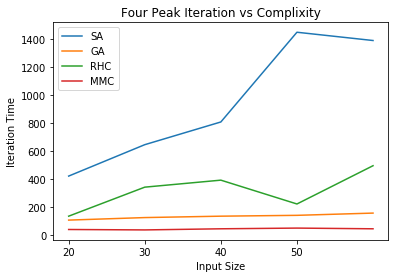

In [96]:
plt.plot(np.asarray(a)[:,0],label ='SA')
plt.plot(np.asarray(b)[:,0],label ='GA')
plt.plot(np.asarray(c)[:,0],label ='RHC')
plt.plot(np.asarray(d)[:,0],label ='MMC')

plt.title('Four Peak Iteration vs Complixity')
plt.xticks(np.arange(5), size)
plt.ylabel('Iteration Time')
plt.xlabel('Input Size')
plt.legend()
plt.savefig('output/fourpeaks_Iteration_comp.png')





## KnapSack

### SA for sacks

In [253]:
# Solve using simulated annealing - attempt 1
init_state = np.array([0]*140)
schedule = mlrose_hiive.ExpDecay()
best_state, best_fitness, fitness_curve_bag,time_curve_bag = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 1000, 
                                                      init_state = init_state, random_state = 1,curve= True)

In [254]:
best_fitness

19560.0

In [255]:
best_state

array([7, 9, 6, 0, 1, 8, 5, 9, 9, 1, 8, 6, 4, 5, 6, 1, 8, 9, 5, 7, 7, 9,
       6, 7, 3, 6, 0, 6, 9, 8, 9, 9, 9, 3, 5, 0, 6, 9, 7, 7, 9, 5, 6, 6,
       7, 8, 4, 8, 6, 4, 3, 8, 7, 6, 9, 9, 9, 9, 9, 9, 0, 9, 7, 7, 0, 2,
       4, 3, 8, 7, 0, 9, 9, 5, 8, 5, 9, 8, 8, 6, 6, 3, 7, 1, 3, 0, 0, 8,
       7, 9, 0, 0, 1, 5, 9, 7, 8, 3, 5, 0, 0, 9, 7, 3, 0, 3, 6, 5, 6, 8,
       4, 9, 8, 3, 6, 9, 7, 3, 8, 8, 0, 7, 6, 3, 4, 8, 8, 4, 9, 8, 1, 7,
       6, 2, 5, 9, 9, 9, 9, 9])

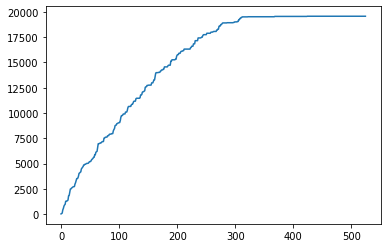

In [256]:
plt.plot(fitness_curve_bag)

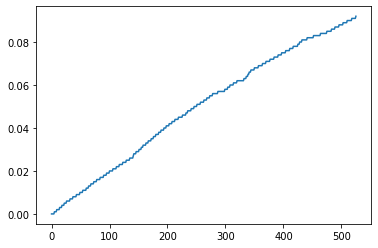

In [257]:
plt.plot(time_curve_bag)

### GA for sacks

In [258]:
# Solve using genetic algorithm
best_state, best_fitness, fitness_curve_bag = mlrose_hiive.genetic_alg(problem_cust, mutation_prob = 0.2, max_attempts = 100, 
                                              random_state = 2,curve=True)

In [259]:
best_fitness

27818.0

In [245]:
np.array([1]*4+[0])

array([1, 1, 1, 1, 0])

In [246]:
state = np.array([1, 1, 1, 1, 1])

In [218]:
fitness.evaluate(state)

0

In [260]:
best_state

array([9, 2, 4, 9, 0, 9, 9, 2, 9, 3, 9, 2, 9, 9, 4, 3, 9, 9, 9, 0, 9, 9,
       9, 9, 9, 0, 3, 0, 9, 0, 9, 9, 0, 8, 3, 9, 3, 0, 9, 3, 1, 0, 9, 1,
       9, 9, 9, 9, 9, 2, 9, 9, 9, 0, 9, 0, 4, 0, 9, 5, 9, 9, 9, 0, 8, 9,
       4, 9, 0, 9, 9, 9, 8, 9, 9, 9, 9, 6, 9, 9, 9, 9, 2, 9, 7, 2, 7, 9,
       9, 0, 9, 8, 9, 6, 0, 9, 9, 9, 9, 9, 8, 9, 7, 9, 9, 9, 4, 8, 9, 0,
       9, 9, 9, 5, 9, 1, 9, 0, 2, 9, 9, 9, 8, 9, 5, 9, 9, 9, 9, 9, 1, 9,
       0, 9, 9, 9, 9, 4, 0, 9])

In [209]:
weights

[10, 5, 2, 8, 15]

In [229]:
sum(best_state)

634

In [178]:
sum(wei)

3623

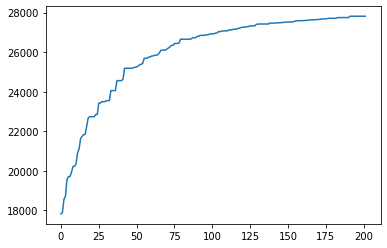

In [261]:
plt.plot(fitness_curve_bag)

## mimic for sacks

In [183]:
state

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [263]:
best_state, best_fitness, fitness_curve_bag = mlrose_hiive.mimic(problem_cust,  max_attempts = 10, 
                                                                 max_iters=100,
                                              random_state = 2,curve=True)

In [348]:
best_state, best_fitness, fitness_curve_bag = mlrose_hiive.mimic(problem_cust,  max_attempts = 1000, 
                                                                 max_iters=10000,
                                              random_state = 2,curve=True)

In [264]:
best_fitness

24614.0

In [165]:
len(wei)

140

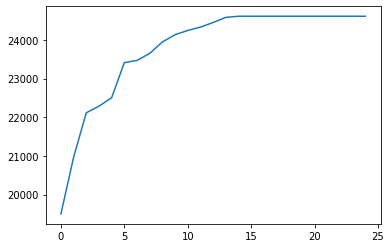

In [265]:
plt.plot(fitness_curve_bag)

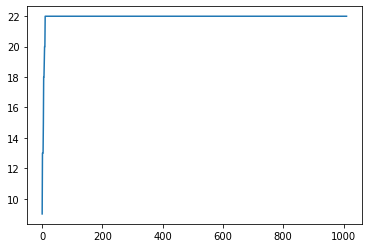

In [350]:
plt.plot(fitness_curve_bag)

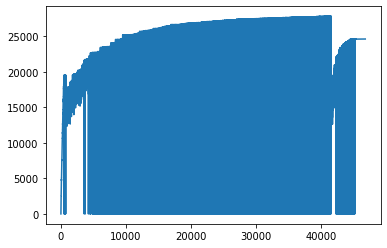

In [267]:
plt.plot(np.array(evaluations))

In [349]:
with open('mimic_sack_eval.npy', 'wb') as f:
    np.save(f, np.array(evaluations))
with open('mimic_sack_fit_curve.npy', 'wb') as f:
    np.save(f, np.array(best_state))
with open('mimic_sack_best_fitness.npy', 'wb') as f:
    np.save(f, np.array(fitness_curve_bag))

In [300]:
    
with open('output/mimic_sack_eval.npy', 'rb') as f:
    a = np.load(f)


In [299]:
import os
os.getcwd()

'C:\\Users\\xiaoyal\\github\\ml_7641\\homework2\\mlrose-master'

### SA for 4 peak

In [353]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [362]:
# Solve using simulated annealing - attempt 1
random.seed(0)
init_state = [random.randint(0,1) for _ in range(60)]

best_state, best_fitness, fit_curve,fit_time = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 1000, max_iters = 10000, 
                                                      init_state = init_state, random_state = 1,curve= True)

In [363]:
best_fitness

60.0

In [360]:
best_state

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

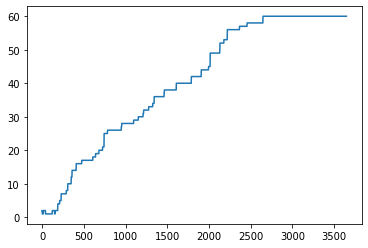

In [364]:
plt.plot(fit_curve)

## mimic for 4 peaks

In [365]:
from mlrose_hiive import mimic

In [368]:
best_state, best_fitness, fitness_curve_mimic = mlrose_hiive.mimic(problem_cust,  max_attempts = 10, 
                                                                 max_iters=100,
                                              random_state = 2,curve=True)

In [369]:
best_fitness

22.0

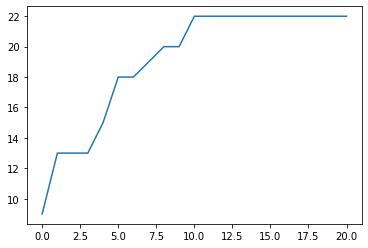

In [371]:
plt.plot(fitness_curve_mimic)

### GA for 4 peaks

In [379]:
best_state, best_fitness, fit_curve = mlrose_hiive.genetic_alg(problem_cust, max_attempts=1000,max_iters=10000, 
                                                               random_state = 2,curve= True)

In [380]:
best_fitness

107.0

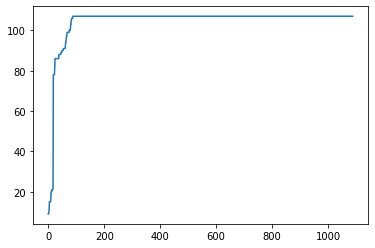

In [381]:
plt.plot(fit_curve)

### rhc for 4 peaks

In [384]:
best_state, best_fitness, fit_curve = mlrose_hiive.random_hill_climb(problem_cust, max_attempts=1000,max_iters=10000, 
                                                               random_state = 2,curve= True,restarts = 5)

In [386]:
best_fitness

60.0

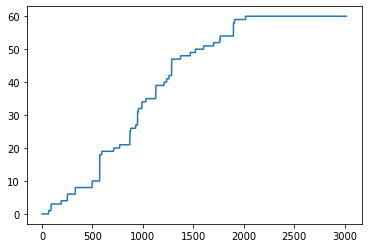

In [385]:
plt.plot(fit_curve)

In [427]:
random.seed(0) 

wei = [random.randint(1,50) for _ in range(140)]

In [428]:
wei[:10]

[25, 49, 27, 3, 17, 33, 32, 26, 20, 31]